In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df=pd.read_excel("datafile.xls")
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [12]:
df.isnull().sum().sum()

0

In [13]:
del(df['REGION'])
cols=df.columns

## The annual attribute is the sum of physical quantity in all the months
Similarly, The attributes Jan-feb, Mar-May, Jun-Sep, Oct-dec are sum of the physical quantities in respective months

In [14]:
a=df['JAN']
for i in range(2,13):
    a=a+(df[cols[i]])
a=pd.DataFrame(a)
a.columns=['Check']
dfCheck=pd.DataFrame({'a':a.Check, 'b':df['ANNUAL']})
(dfCheck.a-dfCheck.b).sum()

-0.799999999998704

In [49]:
df2=df.set_index('YEAR').T
df2.head()

YEAR,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
JAN,34.7,7.4,17.0,14.4,25.3,21.2,16.2,21.8,23.3,15.6,...,17.4,2.7,22.4,11.8,7.5,7.7,28.5,10.0,17.3,17.4
FEB,37.7,4.3,8.3,9.6,20.9,50.8,46.0,17.8,17.9,11.1,...,11.5,35.7,19.2,13.2,16.3,26.3,10.8,36.9,25.9,21.0
MAR,18.0,19.0,31.3,31.8,42.7,31.7,37.8,8.7,7.2,13.8,...,34.4,34.4,37.7,15.2,16.6,21.4,10.6,14.5,32.6,62.0
APR,39.3,43.5,17.1,33.1,33.7,16.1,62.8,33.3,63.0,29.2,...,30.4,33.6,32.6,26.0,42.1,41.0,48.5,29.4,20.2,69.4
MAY,50.8,48.3,59.5,72.4,55.7,36.7,32.6,45.4,52.1,41.5,...,80.7,50.4,45.2,56.6,69.0,51.6,32.1,56.5,72.8,53.8


## First to visualize how the physical quantity varies with respect to months from year 1901 to 2015 

WE can see that there is constant variation in the physical quantity in the range of almost 50units in the respective months from year 1901 to 2015

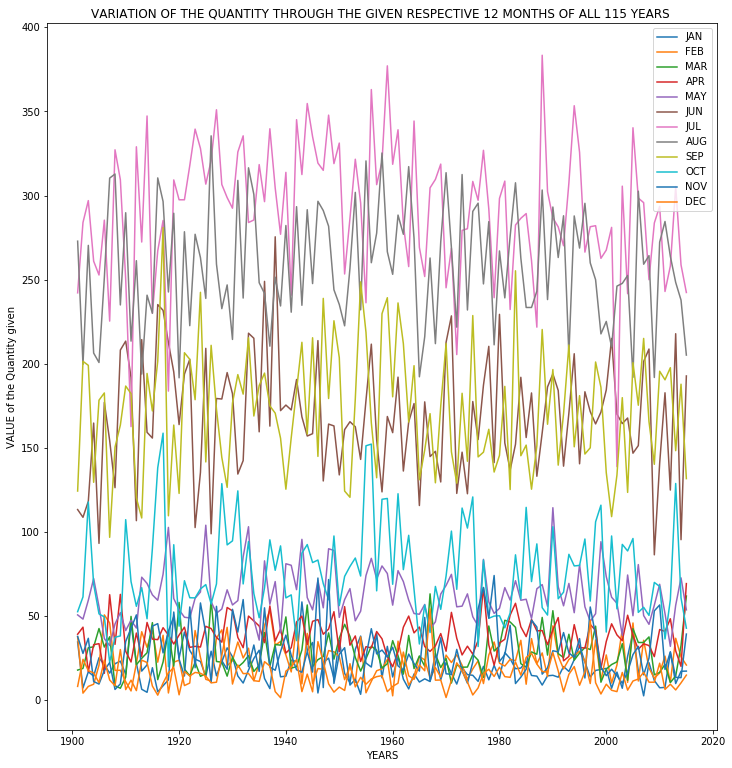

In [94]:
plt.figure(figsize=(12, 13))
for i in cols[1:13]:
    plt.plot(df['YEAR'], df[i])
colo=pd.DataFrame(df.iloc[:, 1:13].columns)
colo.columns=['Month']
plt.legend(colo['Month'])
plt.xlabel('YEARS')
plt.ylabel('VALUE of the Quantity given')
plt.title("VARIATION OF THE QUANTITY THROUGH THE GIVEN RESPECTIVE 12 MONTHS OF ALL 115 YEARS ")
plt.show()

### To be more specific, the weather phenomenon provided, is highest in July, August, September and Lowest in December, January, February

This can be varified using the heirarchical clustering from below:
Hierarchical clustering, also known as hierarchical cluster analysis, is an unsupervised learning algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

From below graph we can easily infer that the 2 main clusters shall be (jun, jul, aug, sep), (jan, feb, march, apr, may, dec, nov, oct) where we can see the significant difference in the value or shade 

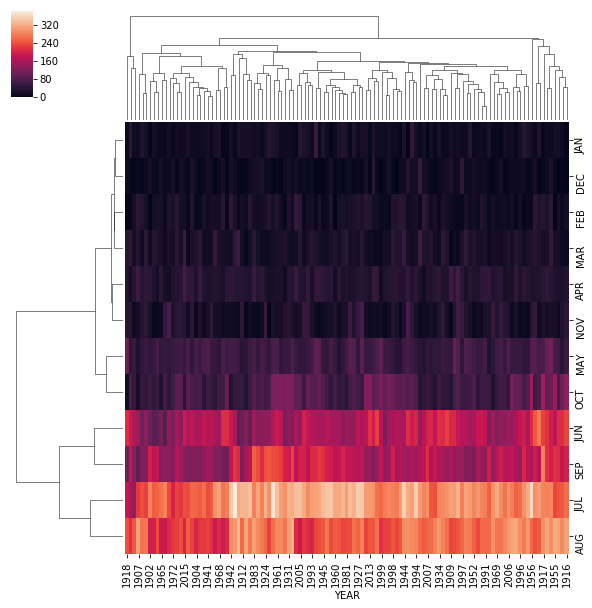

In [26]:
g=sns.clustermap(df2.iloc[0:12, :])

## TO be more specific, the given physical Quantity of weather is highest in JULY of most of years from 1901 to 2015
On the first impression, The increase of physical quantity is the main outcome from the graph in may to july. This is nothing but nearly a slighty positively skewed Distribution of data on first look as the rate of decrease from july to December is less than the rate of increase from January to July

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


Text(0.5, 1.0, 'Mean of all the values is plotted')

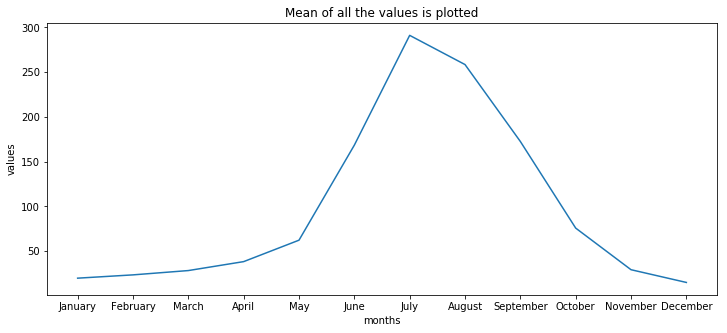

In [28]:
des=df.describe()
del(des['YEAR'])
description=des.T
print(description.columns)
x_axis=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y_axis=description.iloc[0: 12, :]
plt.figure(figsize=(12, 5))
plt.plot(x_axis, y_axis.iloc[0:12:, 1:2])
plt.xlabel('months')
plt.ylabel("values")
plt.title("Mean of all the values is plotted")

### Infering  the generic trends of the data observed we plot the below graph that infers further that, 
The Above graph says that the physical quantity is more in the months of july, august and september and the graph below says about the distribution of the data points in the months of july, august and september
we can infer these points from the graph
i.e 
1. In September, The quantity has gone upto 175 for upto 23 times
2. In August, The quantity has gone upto 240 for upto 18 times
3. In July, The quantity has reached more than 300 for more than 30 times

##### This shall be said as the generic trend of the data

Text(0.5, 1.0, 'distribution of data points according to july, august, september')

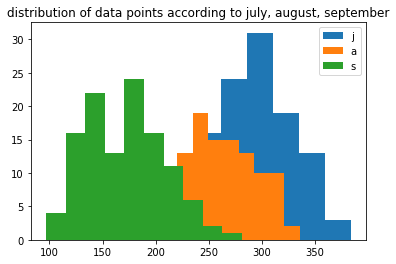

In [29]:
y_axis_july=df2.iloc[6:7,:]
plt.hist(y_axis_july)
y_axis_aug=df2.iloc[7:8,:]
plt.hist(y_axis_aug)
y_axis_sept=df2.iloc[8:9,:]
plt.hist(y_axis_sept)
plt.legend("jas")
plt.title("distribution of data points according to july, august, september")

## From plotting the correlation graph between the years, patterns of the data can be visualized
Here, the period from 1901 to 1920 seemed to have irregular distribution of data as the correlation of data in that period of time is not according to the usual positively skewed distribution

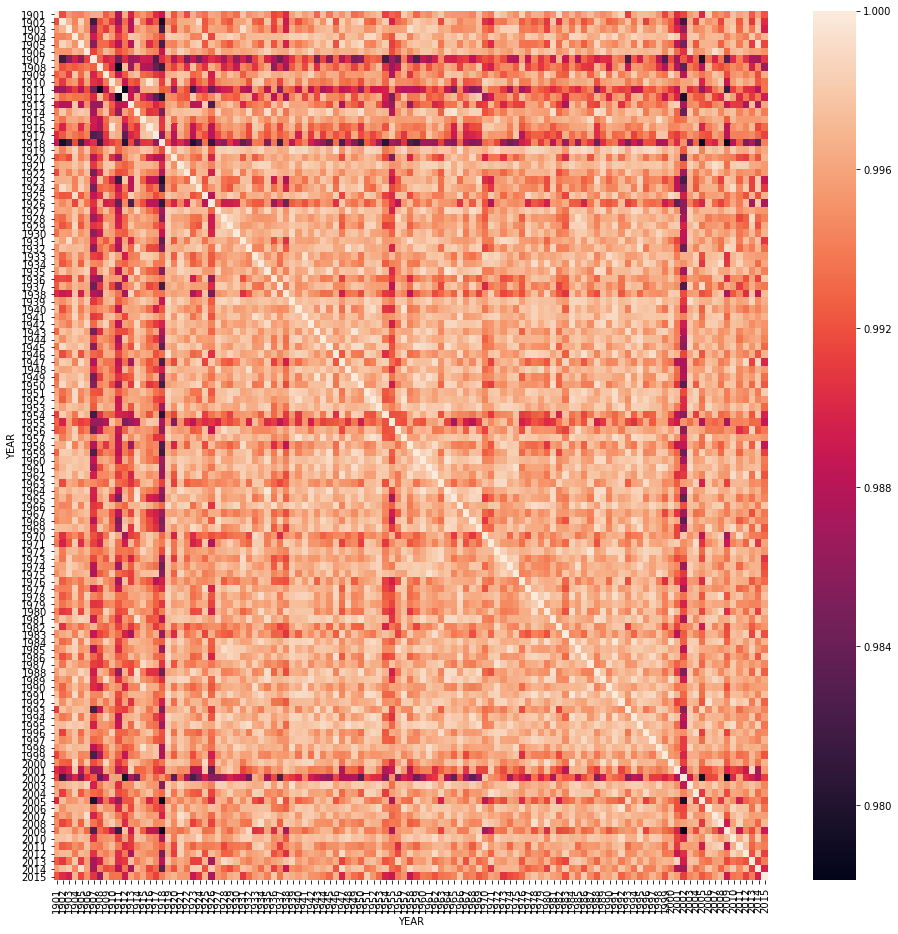

In [30]:
corr = df2.iloc[1:13, :].corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Plotting the data based on the above correlation graph, few pattern was found from the time period of 1901 to 1920  hence we shall plot the physical quantity variation for descreet period of 20 years from 1901 to 2015 

In [110]:
years=pd.DataFrame(df2.columns)
years.columns=['YEAR']

Text(0.5, 1.0, 'Phenomenon is more in the month of July of every year from 2002 to 2015')

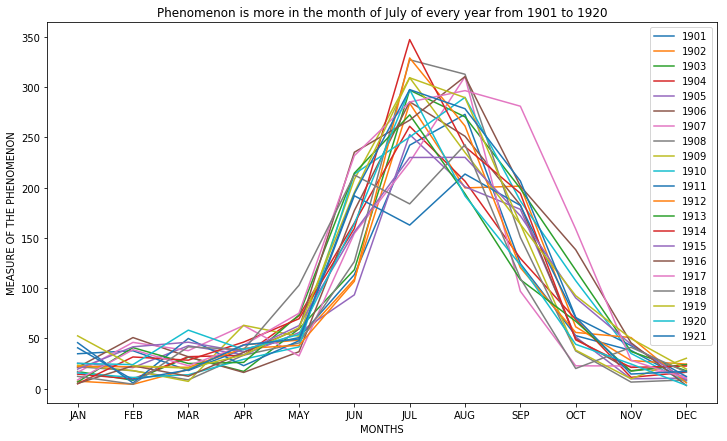

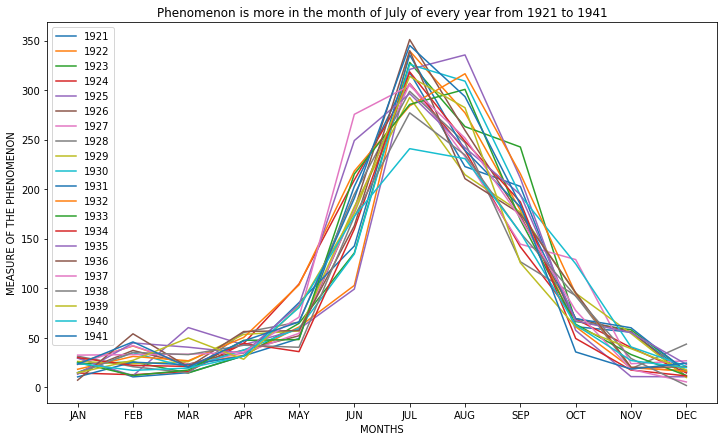

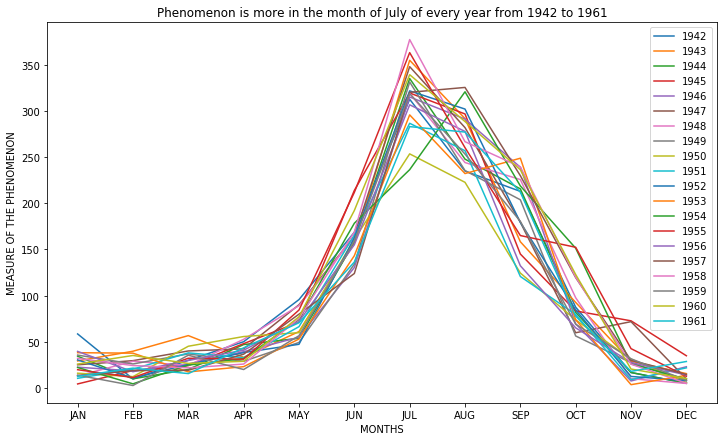

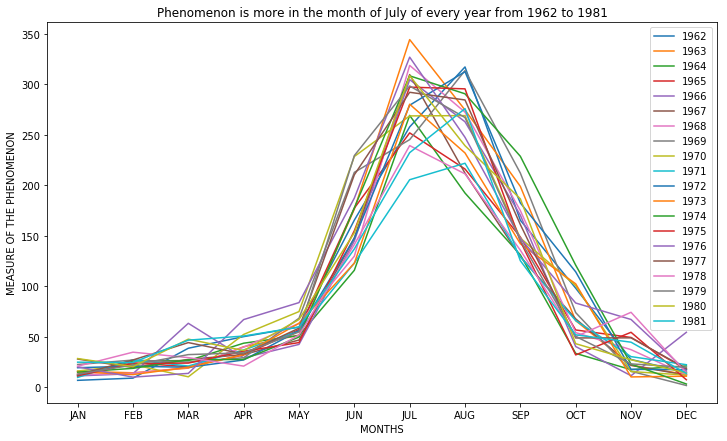

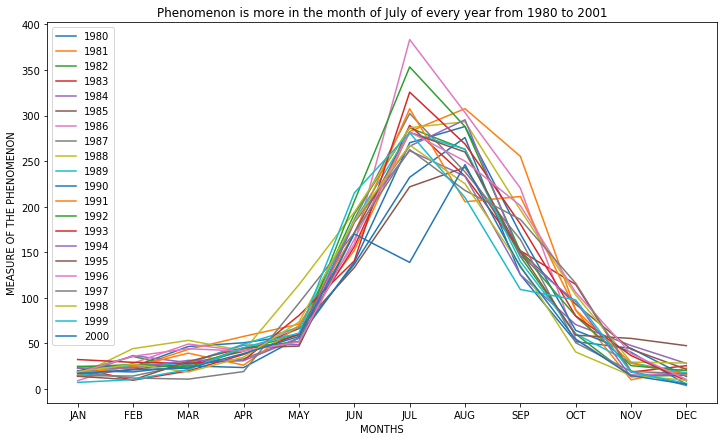

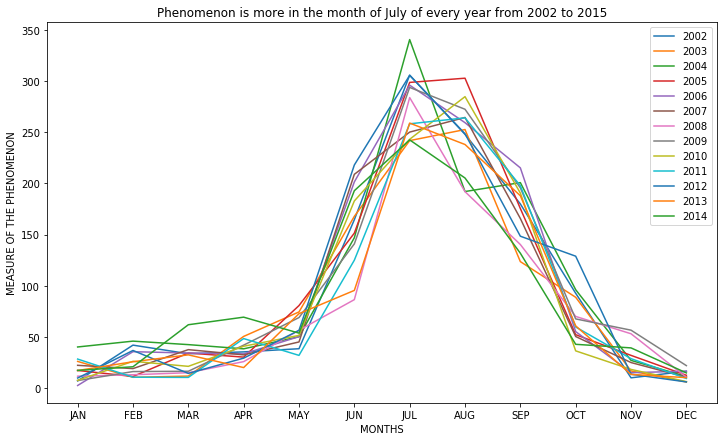

In [120]:
x_axis=df2.iloc[0:12, 0:21].index
y_axis=df2.iloc[0:12, 0:21]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']<=1921]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 1901 to 1920")

x_axis=df2.iloc[0:12, 21:42].index
y_axis=df2.iloc[0:12, 21:42]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']>=1921]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 1921 to 1941")

x_axis=df2.iloc[0:12, 42:62].index
y_axis=df2.iloc[0:12, 42:62]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']>=1942]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 1942 to 1961")

x_axis=df2.iloc[0:12, 62:82].index
y_axis=df2.iloc[0:12, 62:82]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']>=1962]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 1962 to 1981")

x_axis=df2.iloc[0:12, 81:102].index
y_axis=df2.iloc[0:12, 81:102]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']>=1980]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 1980 to 2001")

x_axis=df2.iloc[0:12, 102:].index
y_axis=df2.iloc[0:12, 102:]
plt.figure(figsize=(12, 7))
plt.plot(x_axis, y_axis)
plt.xlabel("MONTHS")
temp=df.loc[df['YEAR']>=2002]
plt.legend(temp['YEAR'])
plt.ylabel("MEASURE OF THE PHENOMENON")
plt.title("Phenomenon is more in the month of July of every year from 2002 to 2015")

### From the above graphs We may spot few years which have anamoly in data distribution from january to december

We may now extract such years as the data points where the atmostpheric imbalance shall have happened

10     1911
17     1918
101    2002
Name: YEAR, dtype: int64


Text(0, 0.5, 'Value of the phyical quantity')

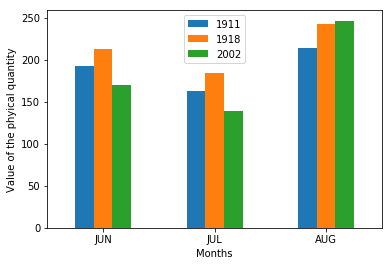

In [74]:
xx=df.loc[df['JUL'] < df['AUG']]
dfTrap=xx.loc[xx['JUL'] < xx['JUN']]
print(dfTrap.YEAR)
dfTrap.iloc[:, 6:9].T.plot.bar(rot=0)
plt.legend(dfTrap['YEAR'])
plt.xlabel("Months")
plt.ylabel("Value of the phyical quantity")

### From the above output, we shall see that the anamolies are in the year 1911, 1918, 2002

Those are the years in which the quantity at july was less than august as well as june which is obviously an anamoly
and We shall say that the effect of the natural calamities in these 3 years is for the anamoly i.e. the irregular decrease in physical quantity in the month of JULY.